In [4]:
import pandas as pd
import numpy as np

In [7]:
df_master = df_train.copy()
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [8]:
df_train.shape
df_test.shape

(1459, 80)

### BASIC PIPELINE 

In [9]:
# df_train.info()

In [13]:
# dfbas_train = df_train.select_dtypes(exclude= 'object')
# dfbas_test = df_test.select_dtypes(exclude= 'object')


def fun_remove_object_cols(df):
    df = df.select_dtypes(exclude= 'object')
    return df

dfbas_train = fun_remove_object_cols(df_train)
dfbas_test =  fun_remove_object_cols(df_test)

In [14]:
dfbas_train.shape
dfbas_test.shape

(1459, 37)

In [49]:
dfbas_test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0.0,0,0,0,0,0,0,0,6,2006
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,286.0,0,24,0,0,0,0,0,4,2006
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,576.0,474,0,0,0,0,0,0,9,2006
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0.0,80,32,0,0,0,0,700,7,2006


In [15]:
tmp=  dfbas_train.isnull().sum()/dfbas_train.shape[0] * 100
tmp.sort_values(ascending=False)[:20]

LotFrontage     17.739726
GarageYrBlt      5.547945
MasVnrArea       0.547945
BsmtFinSF1       0.000000
LowQualFinSF     0.000000
2ndFlrSF         0.000000
1stFlrSF         0.000000
TotalBsmtSF      0.000000
BsmtUnfSF        0.000000
BsmtFinSF2       0.000000
SalePrice        0.000000
BsmtFullBath     0.000000
YearRemodAdd     0.000000
YearBuilt        0.000000
OverallCond      0.000000
OverallQual      0.000000
LotArea          0.000000
MSSubClass       0.000000
GrLivArea        0.000000
BsmtHalfBath     0.000000
dtype: float64

In [17]:
# dfbas_train = dfbas_train.fillna(0)
#dfbas_train.isnull().sum()/dfbas_train.shape[0] * 100

def fillna(df):
    df = df.fillna(0)
    return df 



In [18]:
# dfbas_test = dfbas_test.fillna(0)

In [19]:
dfbas_train = fillna(dfbas_train)
dfbas_test = fillna(dfbas_test)


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [21]:
y=dfbas_train['SalePrice']
X=dfbas_train.drop(['SalePrice'],axis=1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
linreg = LinearRegression()
#linreg.fit(X_train, y_train)

In [95]:
def model_train(classifier, X_train, y_train, X_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    return y_pred

model_train(linreg, X_train, y_train, X_test)    

array([240520.7320477 , 152606.89746189,  93691.76458044, 228699.83959248,
       101072.84618282,  92876.60746788, 253873.75939356, 132661.72010434,
       507795.05898767, 143555.65365829, 183749.47255916, 145017.04335986,
       246266.86576461, 109080.16362752, 134933.52162477, 140858.41758382,
       235288.71660769, 115588.8962441 , 120339.58333493, 168960.31410889,
       122086.15638666, 152375.96167277, 108938.09971833, 158998.23076656,
       200499.56812674, 198422.47584007, 152912.69430564,  63863.93437986,
       318163.00945156, 120827.61382956, 161270.26796403, 216588.38061138,
       149725.92974785, 290575.3007748 , 297183.47290645, 195957.1129474 ,
       270343.8593536 , 112048.7122755 , 222360.5079188 , 330956.0037581 ,
       216462.24642052, 119638.8785242 , 187169.17161112, 293294.58665869,
       334759.29664571, 107835.83888949, 130032.60204322, 116158.35528175,
       187763.94637347,  86350.3293182 , 380442.09478017, 153106.7444271 ,
       204788.16598067,  

In [29]:
# y_pred = linreg.predict(X_test)

In [96]:
resuts= pd.DataFrame({'Actual': y_test, 'Predicted':  np.floor(y_pred)})
resuts.head()

,Actual,Predicted
529,200624,250434.0
491,133000,145888.0
459,110000,113639.0
279,192000,229442.0
655,88000,116675.0


In [97]:
from sklearn.metrics import mean_squared_log_error
def compute_rmsle(y_test: np.ndarray, y_pred: np.ndarray, precision: int = 2) -> float:
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    return rmsle

In [98]:
# print('Log RMSE:' , compute_rmsle(y_test, y_pred))
# print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
# print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
# print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

In [99]:
# results_df = pd.DataFrame(columns = ['MODEL', 'LRMSE', 'RMSE','MSE','MAE'])
# def to_result_df(classifier, rmsle, MAE, MSE, RMSE, results_df):
#     results_df1=results_df.append({'MODEL':classifier ,'LRMSE':rmsle, 'MAE':MAE, 'MSE': MSE, 'RMSE':RMSE}, ignore_index=True)
#     return results_df1
    
    

In [134]:



def model_evalution(y_test, y_pred, classifier):
    MAE = np.floor(mean_absolute_error(y_test, y_pred))
    MSE = np.floor(mean_squared_error(y_test, y_pred))
    RMSE = np.floor(np.sqrt(mean_squared_error(y_test, y_pred)))
    rmsle = np.round(compute_rmsle(y_test, y_pred),3)
    print("Log Root Mean Squared Error", rmsle)
    
    #results_df = to_result_df(classifier, rmsle, MAE, MSE, RMSE, results_df)
    
    return 
model_evalution(y_test, y_pred , linreg)    

Log Root Mean Squared Error 0.144


In [53]:
#basepipeline


def submission_to_csv(classifier, test_df):
    
    y_pred = classifier.predict(test_df)
    ID=test_df['Id']
    df_submission = pd.DataFrame({'Id': ID, 'SalePrice': y_pred})
    
    df_submission.to_csv('submission2.csv',index=False)
    return df_submission.head()
    
submission_to_csv(linreg, dfbas_test)    

,Id,SalePrice
0,1461,132842.025462
1,1462,167826.121521
2,1463,182960.850937
3,1464,204310.318884
4,1465,192616.160746


#### Linear Reg with L1 and L2 regularaization 

In [136]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [137]:
# l2 = Ridge(alpha=1.0, normalize=True)

# y_pred= model_train(l2, X_train, y_train, X_test)  
# model_evalution(y_test, y_pred, results_df, l2) 

In [138]:
# l1 = Lasso(alpha=1.0, normalize=True)
# y_pred = model_train(l1, X_train, y_train, X_test)  
# model_evalution(y_test, y_pred, results_df, l1) 


#### Tree Regressors Decision Tree and Random Forest

In [139]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [140]:
# decision = DecisionTreeRegressor(random_state=0)
# y_pred = model_train(decision, X_train, y_train, X_test)  
# model_evalution(y_test, y_pred, results_df, decision) 


In [141]:
# regressor1 = RandomForestRegressor(random_state=0)
# y_pred = model_train(regressor1, X_train, y_train, X_test)  
# model_evalution(y_test, y_pred, results_df, regressor1) 


In [142]:
linreg = LinearRegression()
l2 = Ridge(alpha=1.0, normalize=True)
l1 = Lasso(alpha=1.0, normalize=True)
decision = DecisionTreeRegressor(random_state=0)
regressor1 = RandomForestRegressor(random_state=0)

classifiers= [linreg, l1, l2, decision, regressor1]
for i in classifiers:
    print(i)
    y_pred = model_train(i, X_train, y_train, X_test)  
    model_evalution(y_test, y_pred, i)
 


LinearRegression()
Log Root Mean Squared Error 0.208
Lasso(normalize=True)
Log Root Mean Squared Error 0.208
Ridge(normalize=True)
Log Root Mean Squared Error 0.184
DecisionTreeRegressor(random_state=0)
Log Root Mean Squared Error 0.22
RandomForestRegressor(random_state=0)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1939335250.5950928, tolerance: 719132949.9230078
  model = cd_fast.enet_coordinate_descent(


Log Root Mean Squared Error 0.144


### REsults of the Basic Pipeline
#### All non numeric columns are removed and Nan values are filled with 0

In [85]:
results_df

,MODEL,LRMSE,RMSE,MSE,MAE


### Feature Engineering and Model Improvement 

In [173]:
df_train.corr()['SalePrice'].sort_values(ascending = False)
x =pd.DataFrame(df_train.corr()['SalePrice'].sort_values(ascending = False))
y  = x[x['SalePrice'] <  0].index
y.tolist()

['BsmtFinSF2',
 'BsmtHalfBath',
 'MiscVal',
 'Id',
 'LowQualFinSF',
 'YrSold',
 'OverallCond',
 'MSSubClass',
 'EnclosedPorch',
 'KitchenAbvGr']

In [175]:
df_train1 = df_train.drop(y, axis =1)

In [181]:
df_train22 = pd.read_csv('train.csv')

In [185]:
from sklearn.preprocessing  import LabelEncoder
def preproces(df):
    
    ##droping negatively correalted colns with target variablt
    df.corr()['SalePrice'].sort_values(ascending = False)
    x =pd.DataFrame(df.corr()['SalePrice'].sort_values(ascending = False))
    to_drop  = x[x['SalePrice'] <  0].index
    to_drop.tolist()    
    df_1 = df.drop(to_drop, axis =1)
        
    ###remove colms having more than 75% Null values 
    X=  pd.DataFrame(df_1.isnull().sum()/df_1.shape[0] * 100, columns=['Missing_count'])
    to_drop_1  = X[X['Missing_count'] > 75 ].index
    to_drop_1.tolist()
    df_2 = df_1.drop(to_drop_1, axis =1)
    
    ###lets do label encoding
    le=LabelEncoder()
    df_processed = df_2.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')
    
    return df_processed

In [196]:
# df_train22.info()

In [187]:
new_df = preproces(df_train22)

#### Removing negatvely correlated columns 

In [130]:
# df_train1 = df_train.drop(['BsmtHalfBath','BsmtHalfBath', 'MiscVal','LowQualFinSF',
#            'YrSold','OverallCond','MSSubClass','EnclosedPorch','KitchenAbvGr' ]  , axis=1)

In [179]:
# X=  pd.DataFrame(df_train1.isnull().sum()/df_train1.shape[0] * 100, columns=['Missing_count'])
# y  = X[X['Missing_count'] > 75 ].index
# y.tolist()
# # X.sort_values(ascending=False)[:20]

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

#### Removing cols with most nan values

In [162]:
# df_train1 = df_train1.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis = 1)

In [163]:
# df_train1.shape

(1460, 68)

#### Label encoding 38 object colmns 

In [197]:
from sklearn.preprocessing  import LabelEncoder
# le=LabelEncoder()


In [198]:
#df_col.info()
#df_col.apply(LabelEncoder().fit_transform.astype(str))

# df_train1 = df_train1.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')

In [203]:
def training_data_prep(df):
    y=df['SalePrice']
    X=df.drop(['SalePrice'],axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)
    return X_train, X_test, y_train, y_test

In [204]:
 X_train, X_test, y_train, y_test = training_data_prep(new_df)

In [206]:
#linreg = LinearRegression()
l2 = Ridge(alpha=1.0, normalize=True)
l1 = Lasso(alpha=1.0, normalize=True)
decision = DecisionTreeRegressor(random_state=0)
regressor1 = RandomForestRegressor(random_state=0)

classifiers= [ l1, l2, decision, regressor1]
for i in classifiers:
    print(i)
    y_pred = model_train(i, X_train, y_train, X_test)  
    model_evalution(y_test, y_pred, i)
 

Lasso(normalize=True)
Log Root Mean Squared Error 0.981
Ridge(normalize=True)
Log Root Mean Squared Error 0.923
DecisionTreeRegressor(random_state=0)
Log Root Mean Squared Error 1.028
RandomForestRegressor(random_state=0)
Log Root Mean Squared Error 0.827


In [182]:
# y=df_train1['SalePrice']
# X=df_train1.drop(['SalePrice'],axis=1)


In [184]:
# Finalpipeline = pd.DataFrame(columns = ['MODEL', 'LRMSE', 'RMSE','MSE','MAE'])

In [183]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [189]:
linreg = LinearRegression()
# linreg.fit(X_train, y_train)
# y_pred = linreg.predict(X_test)

# resuts= pd.DataFrame({'Actual': y_test, 'Predicted':  np.floor(y_pred)})
# resuts.head()

# #print('Log RMSE:' , compute_rmsle(y_test, y_pred))
# print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
# print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
# print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

# MAE = np.floor(mean_absolute_error(y_test, y_pred))
# MSE = np.floor(mean_squared_error(y_test, y_pred))
# RMSE = np.floor(np.sqrt(mean_squared_error(y_test, y_pred)))
# #rmsle = np.round(compute_rmsle(y_test, y_pred),3)

# Finalpipeline=Finalpipeline.append({'MODEL':'linreg','LRMSE':'NA', 'MAE':MAE, 'MSE': MSE, 'RMSE':RMSE}, ignore_index=True)

Mean Absolute Error: 104.57391857173147
Mean Squared Error: 22384.606363316398
Root Mean Squared Error: 149.61486010191769


In [190]:
Finalpipeline

,MODEL,LRMSE,RMSE,MSE,MAE
0,linreg,NA,149.0,22384.0,104.0


#### negative Log cannot be computed in LRMSE| might be because the data is not normalized for lin reg

In [191]:
l2 = Ridge(alpha=1.0, normalize=True)
l2.fit(X_train, y_train)
y_pred = l2.predict(X_test)

resuts= pd.DataFrame({'Actual': y_test, 'Predicted':  np.floor(y_pred)})
resuts.head()

print('Log RMSE:' , compute_rmsle(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE = np.floor(mean_absolute_error(y_test, y_pred))
MSE = np.floor(mean_squared_error(y_test, y_pred))
RMSE = np.floor(np.sqrt(mean_squared_error(y_test, y_pred)))
rmsle = np.round(compute_rmsle(y_test, y_pred),3)

Finalpipeline=Finalpipeline.append({'MODEL':'Ridge','LRMSE':rmsle, 'MAE':MAE, 'MSE': MSE, 'RMSE':RMSE}, ignore_index=True)

Log RMSE: 0.9627715265547242
Mean Absolute Error: 105.99834013834489
Mean Squared Error: 21415.35428173273
Root Mean Squared Error: 146.33985882777367


In [192]:
Finalpipeline

,MODEL,LRMSE,RMSE,MSE,MAE
0,linreg,NA,149.0,22384.0,104.0
1,Ridge,0.963,146.0,21415.0,105.0


In [194]:
l1 = Lasso(alpha=1.0, normalize=True)
l1.fit(X_train, y_train)
y_pred = l1.predict(X_test)

resuts= pd.DataFrame({'Actual': y_test, 'Predicted':  np.floor(y_pred)})
resuts.head()

print('Log RMSE:' , compute_rmsle(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE = np.floor(mean_absolute_error(y_test, y_pred))
MSE = np.floor(mean_squared_error(y_test, y_pred))
RMSE = np.floor(np.sqrt(mean_squared_error(y_test, y_pred)))
rmsle = np.round(compute_rmsle(y_test, y_pred),3)

Finalpipeline=Finalpipeline.append({'MODEL':'Lasso','LRMSE':rmsle, 'MAE':MAE, 'MSE': MSE, 'RMSE':RMSE}, ignore_index=True)

Log RMSE: 1.0273443281633563
Mean Absolute Error: 127.39344880073742
Mean Squared Error: 25915.577837924735
Root Mean Squared Error: 160.98316010665442


In [195]:
Finalpipeline

,MODEL,LRMSE,RMSE,MSE,MAE
0,linreg,NA,149.0,22384.0,104.0
1,Ridge,0.963,146.0,21415.0,105.0
2,Lasso,1.027,160.0,25915.0,127.0


### Using GridSearchCV to find the optimum params for Tree regressors 

In [196]:
from sklearn.model_selection import GridSearchCV

In [199]:
dec =DecisionTreeRegressor() 
dec.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [204]:
parameters = {'criterion' :['mse', 'mae'], 'max_depth':[12,13,14,15]}
grid = GridSearchCV(DecisionTreeRegressor(), parameters,  refit = True, verbose = 0)
grid.fit(X_train,y_train )

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [12, 13, 14, 15]})

In [205]:
grid.best_params_

{'criterion': 'mse', 'max_depth': 14}

In [206]:
dec1 = DecisionTreeRegressor(criterion= 'mse', max_depth= 14)
dec1.fit(X_train, y_train)
y_pred = dec1.predict(X_test)

resuts= pd.DataFrame({'Actual': y_test, 'Predicted':  np.floor(y_pred)})
resuts.head()

print('Log RMSE:' , compute_rmsle(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE = np.floor(mean_absolute_error(y_test, y_pred))
MSE = np.floor(mean_squared_error(y_test, y_pred))
RMSE = np.floor(np.sqrt(mean_squared_error(y_test, y_pred)))
rmsle = np.round(compute_rmsle(y_test, y_pred),3)

Finalpipeline=Finalpipeline.append({'MODEL':'DeciTree','LRMSE':rmsle, 'MAE':MAE, 'MSE': MSE, 'RMSE':RMSE}, ignore_index=True)

Log RMSE: 1.0590902767092318
Mean Absolute Error: 106.54532166746463
Mean Squared Error: 37068.30549646904
Root Mean Squared Error: 192.53131043149588


In [207]:
Finalpipeline

,MODEL,LRMSE,RMSE,MSE,MAE
0,linreg,NA,149.0,22384.0,104.0
1,Ridge,0.963,146.0,21415.0,105.0
2,Lasso,1.027,160.0,25915.0,127.0
3,DeciTree,1.059,192.0,37068.0,106.0


In [211]:
# parameters = {'criterion' :['mse', 'mae'], 'max_depth':[4,5,6,7], 'n_estimators' : [50,100,150,200]}
# grid = GridSearchCV(RandomForestRegressor(), parameters,  refit = True, verbose = 3)
# grid.fit(X_train,y_train )
# this cell is commented to remoce the outpur log

In [209]:
grid.best_params_

{'criterion': 'mae', 'max_depth': 7, 'n_estimators': 150}

In [213]:
reg1 = RandomForestRegressor(criterion= 'mae', max_depth= 7, n_estimators = 150)
reg1.fit(X_train, y_train)
y_pred = reg1.predict(X_test)

resuts= pd.DataFrame({'Actual': y_test, 'Predicted':  np.floor(y_pred)})
resuts.head()

print('Log RMSE:' , compute_rmsle(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE = np.floor(mean_absolute_error(y_test, y_pred))
MSE = np.floor(mean_squared_error(y_test, y_pred))
RMSE = np.floor(np.sqrt(mean_squared_error(y_test, y_pred)))
rmsle = np.round(compute_rmsle(y_test, y_pred),3)

Finalpipeline=Finalpipeline.append({'MODEL':'RandTree','LRMSE':rmsle, 'MAE':MAE, 'MSE': MSE, 'RMSE':RMSE}, ignore_index=True)

Log RMSE: 0.9076907568945614
Mean Absolute Error: 82.09454337899544
Mean Squared Error: 16119.47499847793
Root Mean Squared Error: 126.96249445595313


In [214]:
Finalpipeline

,MODEL,LRMSE,RMSE,MSE,MAE
0,linreg,NA,149.0,22384.0,104.0
1,Ridge,0.963,146.0,21415.0,105.0
2,Lasso,1.027,160.0,25915.0,127.0
3,DeciTree,1.059,192.0,37068.0,106.0
4,RandTree,0.908,126.0,16119.0,82.0


<AxesSubplot:>

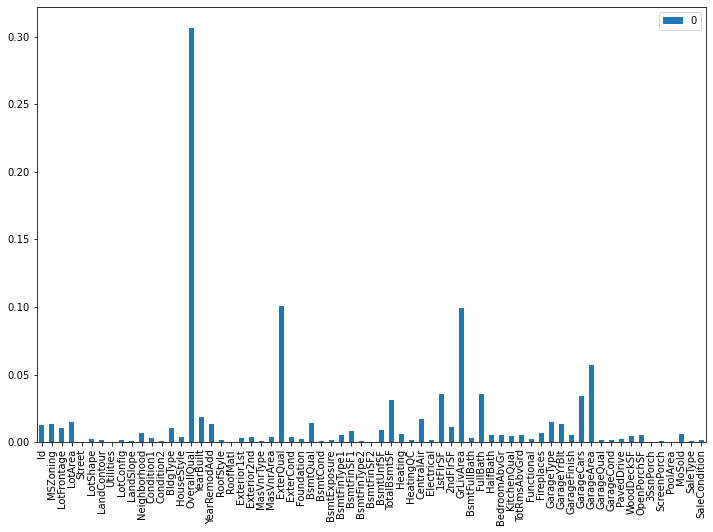

In [217]:
import matplotlib.pyplot as plt
pd.DataFrame(reg1.feature_importances_,index=X_train.columns).plot.bar(figsize=(12,8))

In [220]:
reg2 = RandomForestRegressor(criterion= 'mae',min_samples_split= 3, max_depth= 7, n_estimators = 150)
reg2.fit(X_train, y_train)
y_pred = reg2.predict(X_test)

resuts= pd.DataFrame({'Actual': y_test, 'Predicted':  np.floor(y_pred)})
resuts.head()

print('Log RMSE:' , compute_rmsle(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE = np.floor(mean_absolute_error(y_test, y_pred))
MSE = np.floor(mean_squared_error(y_test, y_pred))
RMSE = np.floor(np.sqrt(mean_squared_error(y_test, y_pred)))
rmsle = np.round(compute_rmsle(y_test, y_pred),3)

Finalpipeline=Finalpipeline.append({'MODEL':'RandTree','LRMSE':rmsle, 'MAE':MAE, 'MSE': MSE, 'RMSE':RMSE}, ignore_index=True)

Log RMSE: 0.9071317124573134
Mean Absolute Error: 82.68179223744293
Mean Squared Error: 16200.79619280822
Root Mean Squared Error: 127.28234831589265


In [221]:
Finalpipeline

,MODEL,LRMSE,RMSE,MSE,MAE
0,linreg,NA,149.0,22384.0,104.0
1,Ridge,0.963,146.0,21415.0,105.0
2,Lasso,1.027,160.0,25915.0,127.0
3,DeciTree,1.059,192.0,37068.0,106.0
4,RandTree,0.908,126.0,16119.0,82.0
5,RandTree,0.907,127.0,16200.0,82.0


In [223]:
# y_pred1 = reg2.predict(dfbas_test)
# df_submission = pd.DataFrame({'Id': ID, 'SalePrice': y_pred1})
# print(df_submission.head())
# df_submission.to_csv('submission1.csv',index=False)